# Spectrums for 50 ms

In [1]:
import scipy
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
import IPython.display as ipd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def restore(D, frame_size, hop_length, epochs=100, length=None):

    D = np.concatenate((np.zeros((D.shape[0], 1)), D, np.zeros((D.shape[0], 1))), axis=1)
    mag, _ = librosa.magphase(D)
    
    phase = np.exp(1.j * np.random.uniform(0., 2*np.pi, size=mag.shape))
    x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
    
    for i in range(epochs):
        _, phase = librosa.magphase(librosa.stft(x_, n_fft=frame_size, hop_length=hop_length, center=False))
        x_ = librosa.istft(mag * phase, hop_length=hop_length, center=False, length=length)
        
    return x_[hop_length:-hop_length]

In [27]:
def repeat(ar, times):
    res = np.empty((0, ar.shape[1]))
    for i in range(times):
        res = np.append(res, ar, axis=0)
    return res

In [62]:
# 1 window
FRAME_SIZE = 1104
SR = 22050
HOP_LENGTH = 1104 * 2

In [3]:
# 3 windows
FRAME_SIZE = 592
SR = 22050
HOP_LENGTH = 256

In [3]:
# 13 windows in ~300ms
FRAME_SIZE = 1104
SR = 22050
HOP_LENGTH = 512

In [62]:
# 134 total samples in A
A = np.loadtxt('./VIE_decod/VIE_Bondarevslsl_och.csv', delimiter=';', ndmin=2)
label = A[:, 0]
A = A[:, 1:]
A.shape

(36555, 36)

In [18]:
# 13 in between 

Syls = np.empty((0, 36))
Ind = np.empty((0, 1))

for i in range(1, 11):
    inds1 = np.array(sorted(list(set(np.arange(len(label))[label == 10 + i]) &
                            (set(np.arange(len(label))[label == i] - 26)))))
    inds2 = inds1 + 26
    inds = np.array(sorted(list(set(inds).union(*[set(inds + j) for j in range(1, 26)]))))
    Syls = np.append(Syls, A[inds].reshape(-1, 36), axis=0)
    Ind = np.append(Ind, label[inds].reshape(-1, 1), axis=0)

In [63]:
# 26 in between

def get_nearest(label, ind):
    while label[ind] != 0:
        ind += 1
    return ind - 1

indices1 = np.empty(0)
indices2 = np.empty(0)
hops = 26 # zeroes
flag = 0 # in block 
count = 0

for i, val in enumerate(label):
    if val == 0:
        if flag:
            count += 1
            continue
        else:
            continue
    
    if val > 10:
        count = 0
        flag = 1
        last_ind = i
    else:
        if count != hops:
            count = 0
            continue
        else: 
            count = 0
            indices1 = np.append(indices1, last_ind)
            indices2 = np.append(indices2, get_nearest(label, i))
            
indices1 = np.array(sorted(list(set(indices1).union(*[set(indices1 + j) for j in range(1, 26)]))))
indices2 = np.array(sorted(list(set(indices2).union(*[set(indices2 + j) for j in range(1, 26)]))))
inds = np.array(sorted(list(set(indices1).union(indices2))))

In [64]:
inds = inds.astype(int)
inds.shape

(6760,)

In [65]:
# Concatanating rows for each syllable

Syls = A[inds].reshape(-1, 26, 36)
Syls = Syls.reshape(Syls.shape[0], -1)
Syls.shape

(260, 936)

In [66]:
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/Bond.csv", Syls, delimiter=",")

In [121]:
Ind.shape

(3484, 1)

In [43]:
BA, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/Ba.wav', sr=SR)
FA, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/fa.wav', sr=SR)
GA, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/Ga.wav', sr=SR)
MA, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/Ma.wav', sr=SR)
RA, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/Ra.wav', sr=SR)
BU, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/Bu.wav', sr=SR)
RU, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/Ru.wav', sr=SR)
MU, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/mu.wav', sr=SR)
FU, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/fu.wav', sr=SR)
GU, _ = librosa.load('/home/srg/Documents/MSU/EEG/data/sound_files/Gu.wav', sr=SR)

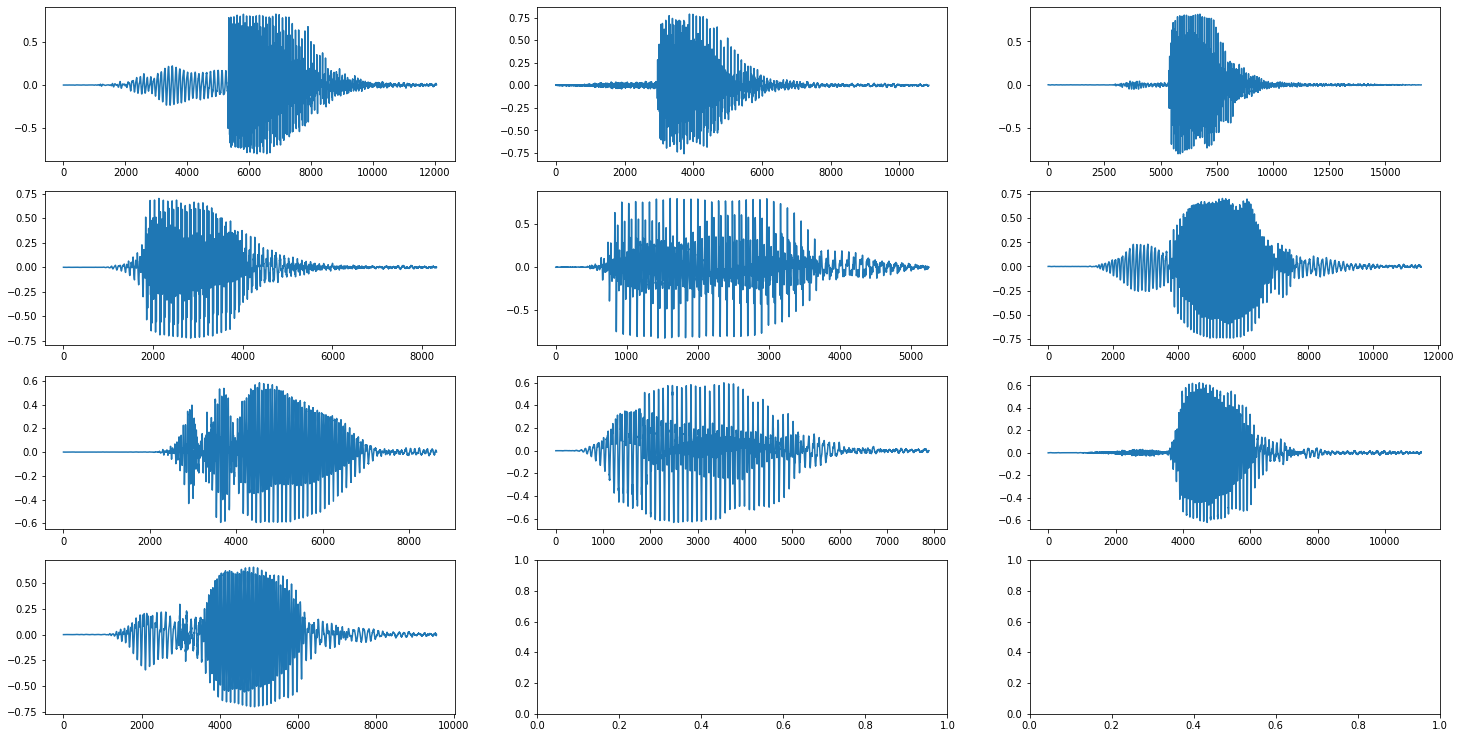

In [134]:
fig, axes = plt.subplots(figsize=(25, 13), nrows=4, ncols=3)
axes[0][0].plot(BA)
axes[0][1].plot(FA)
axes[0][2].plot(GA)
axes[1][0].plot(MA)
axes[1][1].plot(RA)
axes[1][2].plot(BU)
axes[2][0].plot(RU)
axes[2][1].plot(MU)
axes[2][2].plot(FU)
axes[3][0].plot(GU)

In [30]:
Signal = np.empty((0, 7248))
Signal = np.concatenate((Signal, BA[2000:2000+7248].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, FA[1000:1000+7248].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, GA[4000:4000+7248].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, MA[:7248].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(RA.reshape(1, -1), np.zeros((1, 7248 - RA.shape[0])), axis=1)), axis=0)
Signal = np.concatenate((Signal, BU[1500:1500+7248].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, RU[RU.shape[0]-7248:].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, MU[:7248].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, FU[2000:2000+7248].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, GU[1000:1000+7248].reshape(1, -1)), axis=0)

In [138]:
Signal.shape

(10, 7248)

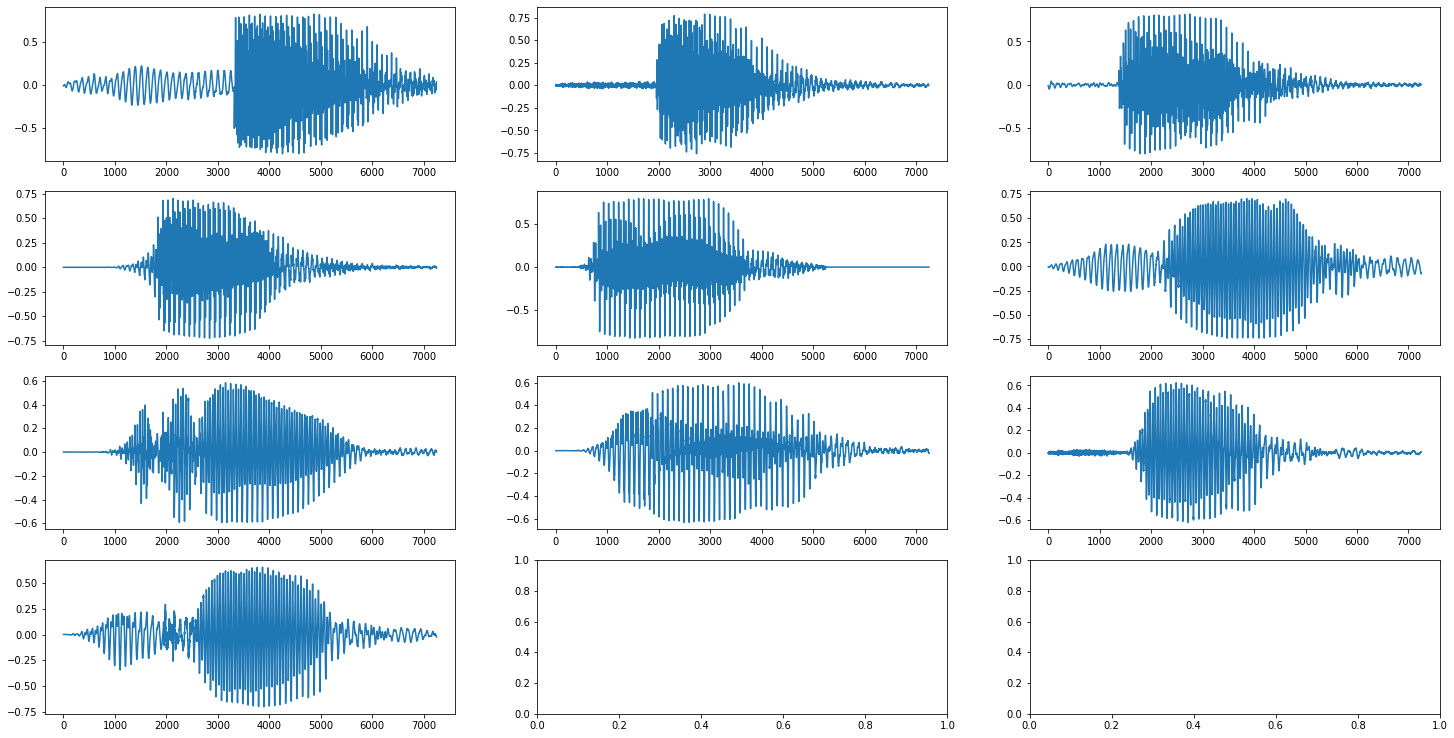

In [139]:
fig, axes = plt.subplots(figsize=(25, 13), nrows=4, ncols=3)
for i, sig in enumerate(Signal):
    axes[i // 3][i % 3].plot(sig)

In [140]:
librosa.stft(Signal[0], n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False).shape

(553, 13)

In [142]:
Specs = np.empty((0, 553, 13))
for sig in Signal:
    x = np.abs(librosa.stft(sig, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False))
    Specs = np.append(Specs, x.reshape(1, 553, 13), axis=0)

In [143]:
Specs.shape

(10, 553, 13)

In [150]:
# Saving
np.savetxt("./data/50ms/Specs(10x553x13).csv", Specs.reshape(10*553, 13), delimiter=",")

In [ ]:
# Loading
Specs = np.loadtxt('./data/50ms/Specs(10x553x13).csv', delimiter=',', ndmin=2)

In [144]:
Signal = np.empty((0, 7248))
for spec in Specs:
    x_ = restore(spec, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)

In [145]:
#Signal = np.array(list(map(lambda x: x if -1 <= x <= 1 else 0, np.squeeze(Signal.reshape(-1, 1)))))
Signal = np.squeeze(Signal.reshape(-1, 1))

In [146]:
scipy.io.wavfile.write(f'./sounds/snds_through_alg15/syllables/50ms/res.wav', SR, Signal)

In [72]:
D = Specs[0].reshape(553, 1)

In [73]:
x_ = restore(D, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)

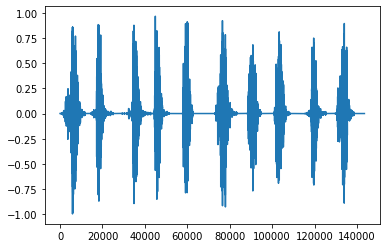

In [132]:
plt.plot(Signal)

In [51]:
b.shape

(5520,)

In [44]:
# 26 in between
# 13904 samples

Signal = np.empty((0, 13904))
Signal = np.concatenate((Signal, np.append(BA, np.zeros(13904 - BA.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(FA, np.zeros(13904 - FA.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, GA[:13904].reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(MA, np.zeros(13904 - MA.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(RA, np.zeros(13904 - RA.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(BU, np.zeros(13904 - BU.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(RU, np.zeros(13904 - RU.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(MU, np.zeros(13904 - MU.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(FU, np.zeros(13904 - FU.shape[0])).reshape(1, -1)), axis=0)
Signal = np.concatenate((Signal, np.append(GU, np.zeros(13904 - GU.shape[0])).reshape(1, -1)), axis=0)

In [45]:
Specs = np.empty((0, 553, 26))
for sig in Signal:
    x = np.abs(librosa.stft(sig, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH, center=False))
    Specs = np.append(Specs, x.reshape(1, 553, 26), axis=0)
Specs.shape

(10, 553, 26)

In [34]:
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/Specs(10x553x26).csv", Specs.reshape(10*553, 26), delimiter=",")

In [46]:
Specs = np.concatenate((Specs[-1].reshape(1, 553, 26), Specs[:-1]), axis=0)

In [18]:
# Building Specs
B = np.empty((0, 553))

for l in label[inds][::26]:
    B = np.append(B, Specs[int(l) % 10].T, axis=0)

In [20]:
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/A.csv", A[inds], delimiter=",")
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/B.csv", B, delimiter=",")

In [21]:
Signal = np.empty((0, 13904))
for spec in B.reshape(-1, 26, 553):
    x_ = restore(spec.T, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)

In [22]:
x = np.squeeze(Signal.reshape(-1, 1))
scipy.io.wavfile.write('/home/srg/Documents/MSU/EEG/data/50ms/1.wav', SR, x)

### Means

In [25]:
# means for A

A = A[inds]
label = label[inds]

Syls = np.empty((0, 36))
Ind = np.empty((0, 1))

for i in range(1, 11):
    cur_inds = np.arange(len(label))[label == 10 + i]
    cur_inds = np.array(sorted(list(set(cur_inds).union(*[set(cur_inds + j) for j in range(1, 52)]))))
    for j in range(52):
        Syls = np.append(Syls, np.mean(A[cur_inds][j::52, :], axis=0).reshape(1, -1), axis=0)
        Ind = np.append(Ind, np.mean(label[cur_inds][j::52].reshape(-1, 1), axis=0).reshape(-1, 1), axis=0)

In [26]:
Syls.shape

(520, 36)

In [34]:
# Building Specs
B = np.empty((0, 553))

for i in range(10):
    B = np.append(B, repeat(Specs[i].T, times=2), axis=0)
    
B.shape

(520, 553)

In [35]:
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/Amean.csv", Syls, delimiter=",")
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/Bmean.csv", B, delimiter=",")

### n x 936 case

In [47]:
# Building Specs

B = np.empty((0, 553))

for l in label[inds][::26]:
    B = np.append(B, Specs[int(l) % 10].T, axis=0)

In [48]:
B.shape

(4160, 553)

In [49]:
B = B.reshape(-1, 26, 553)
B = B.reshape(B.shape[0], -1)
B.shape

(160, 14378)

In [50]:
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/B26.csv", B, delimiter=",")

In [40]:
Signal = np.empty((0, 13904))
for spec in B.reshape(-1, 26, 553):
    x_ = restore(spec.T, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH, epochs=10)
    Signal = np.append(Signal, x_.reshape(1, -1), axis=0)
    
x = np.squeeze(Signal.reshape(-1, 1))
scipy.io.wavfile.write('/home/srg/Documents/MSU/EEG/data/50ms/1.wav', SR, x) # OK

## Test set

In [55]:
def get_nearest(label, ind):
    while label[ind] != 0:
        ind += 1
    return ind - 1

indices1 = np.empty(0)
indices2 = np.empty(0)
hops = 24 # zeroes
flag = 0 # in block 
count = 0

for i, val in enumerate(label):
    if val == 0:
        if flag:
            count += 1
        continue
    
    if val > 10:
        count = 0
        flag = 1
        last_ind = i
    else:
        if count != hops:
            count = 0
            continue
        else: 
            count = 0
            indices1 = np.append(indices1, last_ind)
            indices2 = np.append(indices2, get_nearest(label, i))
            
indices1 = np.array(sorted(list(set(indices1).union(*[set(indices1 + j) for j in range(1, 26)]))))
indices2 = np.array(sorted(list(set(indices2).union(*[set(indices2 + j) for j in range(1, 26)]))))
inds = np.array(sorted(list(set(indices1).union(indices2)))).astype(int)
inds.shape

(104,)

In [56]:
label[inds]

array([17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
        7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [59]:
Test = A[inds]
Test.shape

(104, 36)

In [60]:
Test = Test.reshape(-1, 26, 36)
Test = Test.reshape(Test.shape[0], -1)
Test.shape

(4, 936)

In [61]:
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/Test1.csv", Test, delimiter=",")

## Concatenating 26 & 27

In [51]:
A26 = np.loadtxt('/home/srg/Documents/MSU/EEG/data/50ms/A26.csv', delimiter=',', ndmin=2)
A27 = np.loadtxt('/home/srg/Documents/MSU/EEG/data/50ms/A27.csv', delimiter=',', ndmin=2)
A = np.concatenate((A26, A27), axis=0)
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/A.csv", A, delimiter=",")

In [52]:
A.shape

(348, 936)

In [53]:
B26 = np.loadtxt('/home/srg/Documents/MSU/EEG/data/50ms/B26.csv', delimiter=',', ndmin=2)
B27 = np.loadtxt('/home/srg/Documents/MSU/EEG/data/50ms/B.csv', delimiter=',', ndmin=2)
B = np.concatenate((B26, B27), axis=0)
np.savetxt("/home/srg/Documents/MSU/EEG/data/50ms/B.csv", B, delimiter=",")
B.shape

(348, 14378)